In [1]:
import numpy as np
from Strassen import strassen
from AI_mul import ai
from Binet import binet
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def random_matrix(m, n):
    return np.random.uniform(0.00000001, 1, (m, n))

In [3]:
from time import perf_counter

def timeit(func):
    def wrapper(*args, **kwargs):
        t1 = perf_counter()
        res = func(*args, **kwargs)
        t2 = perf_counter()
        return res, round(t2 - t1, 4)
    return wrapper

In [4]:
time_strassen = timeit(strassen)
time_binet = timeit(binet)
time_ai = timeit(ai)

In [ ]:
measure_binet = []
measure_strassen = []
measure_ai = []

In [110]:
for i in range(9):
    print(i)
    k = pow(2, i)
    mat1 = random_matrix(k, k)
    mat2 = random_matrix(k, k)

    bin_count, bin_time = time_binet(mat1, mat2)
    measure_binet.append((bin_count[1:], bin_time))

    str_count, str_time = time_strassen(mat1, mat2)
    measure_strassen.append((str_count[1:], str_time))

for a, b in [(4, 5), (16, 25), (64, 125), (256, 625)]:
    mat1 = random_matrix(a, b)
    mat2 = random_matrix(b, b)

    ai_count, ai_time = time_ai(mat1, mat2)
    measure_ai.append((ai_count[1:], ai_time))

In [112]:
print(measure_ai)
print(measure_strassen)
print(measure_binet)

[((540, 76), 0.0018), ((52800, 5776), 0.0847), ((4272000, 438976), 5.0392), ((330456000, 33362176), 382.081)]
[((0, 1), 0.0), ((18, 7), 0.0001), ((198, 49), 0.0007), ((1674, 343), 0.0062), ((12870, 2401), 0.0273), ((94698, 16807), 0.1874), ((681318, 117649), 0.9554), ((4842954, 823543), 6.2811), ((34195590, 5764801), 46.0034)]
[((0, 1), 0.0), ((4, 8), 0.0001), ((48, 64), 0.0006), ((448, 512), 0.0061), ((3840, 4096), 0.0427), ((31744, 32768), 0.1881), ((258048, 262144), 1.9761), ((2080768, 2097152), 10.1974), ((16711680, 16777216), 80.7577)]


In [119]:
sizes1 = np.array([pow(2, i) for i in range(9)])
sizes2 = np.array([45, 1025, 23625, 550625])

In [120]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.power(x, b)

In [123]:
def print_all_measurements(sizes, measures):
    add_count, mul_count, time = [], [], []
    for (a, b), c in measures:
        add_count.append(a)
        mul_count.append(b)
        time.append(c)

    data = {"Łączna liczba elementów macierzy": sizes, "Ilość dodawań": add_count, "Ilość mnożeń" : mul_count, "Czas[s]": time}
    df = pd.DataFrame(data)
    df = df.set_index("Łączna liczba elementów macierzy")
    print(df.to_latex(bold_rows=True))

In [124]:
print_all_measurements(sizes2, measure_ai)

\begin{tabular}{lrrr}
\toprule
 & Ilość dodawań & Ilość mnożeń & Czas[s] \\
Łączna liczba elementów macierzy &  &  &  \\
\midrule
\textbf{45} & 540 & 76 & 0.001800 \\
\textbf{1025} & 52800 & 5776 & 0.084700 \\
\textbf{23625} & 4272000 & 438976 & 5.039200 \\
\textbf{550625} & 330456000 & 33362176 & 382.081000 \\
\bottomrule
\end{tabular}



In [136]:
def plot_values(sizes, measures):
    add_count, mul_count, time = [], [], []
    for (a, b), c in measures:
        add_count.append(a)
        mul_count.append(b)
        time.append(c)

    # plt.plot(sizes, mul_count, linestyle="--", marker="o")

    best_curve, curve_variance = curve_fit(func, sizes, time)
    print(best_curve)
    plt.plot(sizes, time, linestyle="None", marker="o")
    mesh = np.linspace(0, sizes[-1])
    mesh_val = func(mesh, best_curve[0], best_curve[1])
    plt.plot(mesh, mesh_val, color="red")
    plt.ylabel("Czas[s]")
    plt.xlabel("Ilość elementów")
    plt.savefig("AI-fit.png")

[4.90603648e-06 1.37460768e+00]


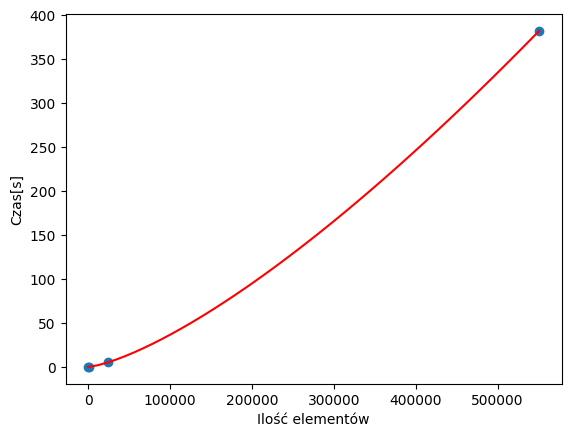

In [137]:
plot_values(sizes2, measure_ai)